# multiscale model fitting for Toy2a

Toy2a is a simplified version of toy2

### start with initalizing many things

In [1]:
# imports
import os
# import sys
import torch
# import pickle
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook import tqdm
# import time
import math

# module_path = os.path.abspath(os.path.join('../src/'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
    
# import torch_cae_multilevel_V4 as net
import ResNet as tnet
import utils

using new ResNet thing


In [2]:
# paths
data_dir = '../data/toy2a'
model_dir = '.'#'../models/toy2a'
result_dir = '../result/toy2a'

#load data
train_data = torch.tensor(np.load(os.path.join(data_dir, 'train_data.npy')))
val_data = torch.tensor(np.load(os.path.join(data_dir, 'val_data.npy')))
test_data = torch.tensor(np.load(os.path.join(data_dir, 'test_data.npy')))

data_of_sizes = {}
current_size = 2
unresolved_dict = {}
model_keep = list()
model_used_dict = {}


In [3]:
#testing dataset new structure
dt = 1
step_size = 32
n_forward = 5
# dataset = tnet.DataSet(torch.flatten(train_data,2,3), torch.flatten(val_data,2,3), torch.flatten(test_data,2,3), dt, step_size, n_forward)

In [7]:
print(dataset.train_ys.shape)

torch.Size([100, 6, 64])


In [3]:

train_dict = utils.make_dict_all_sizes(train_data)
val_dict = utils.make_dict_all_sizes(val_data)

i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
dict_keys(['8', '4', '2', '1'])
i =  0
Transforming
reshape to print
i =  1
Transforming
reshape to print
i =  2
Transforming
reshape to print
dict_keys(['8', '4', '2', '1'])


In [4]:
train_x = train_dict['1'][0,:-1,0]
print(train_x.shape)
train_y = train_dict['1'][0,1:,0]
print(train_y.shape)


torch.Size([499, 1])
torch.Size([499, 1])


In [5]:
%load_ext autoreload
%autoreload 2

In [8]:
step_size = 4
model_time = utils.train_one_timestep(step_size, train_dict['1'], val_dict['1'])

inside train_one_timestep
create model model_L1_D4_noise0.pt ...
data shape =  torch.Size([100, 500, 1, 1])
data shape =  torch.Size([10, 500, 1, 1])
epoch  0 : train_error:  0.30022934 : val_loss  0.2948432
epoch  100 : train_error:  0.026651021 : val_loss  0.02578588
epoch  200 : train_error:  0.0013138988 : val_loss  0.001306591
epoch  300 : train_error:  0.00017254039 : val_loss  0.00017137302
epoch  400 : train_error:  6.7675006e-05 : val_loss  6.869717e-05
epoch  500 : train_error:  5.06371e-05 : val_loss  5.1554347e-05
epoch  600 : train_error:  3.237755e-05 : val_loss  3.229319e-05
epoch  700 : train_error:  2.406808e-05 : val_loss  2.3836224e-05
epoch  800 : train_error:  1.9540596e-05 : val_loss  1.934758e-05
epoch  900 : train_error:  1.606539e-05 : val_loss  1.5964224e-05


using new ResNet thing


<ipython-input-10-6cdaa836ad83>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_first = torch.tensor(inputs[:-1])


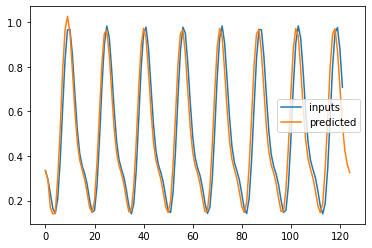

In [10]:
# print(torch.tensor(x[0:1]).unsqueeze(1))
# inputs = np.zeros((498, 2))
# inputs = torch.cat((train_dict['1'][0,:-2,0], train_dict['1'][0,1:-1,0]), axis = 1)
data_smaller = train_dict['1'][:,::step_size]
i = 3
inputs = torch.cat((data_smaller[i,:-3,0], data_smaller[i,1:-2,0], data_smaller[i,2:-1,0]), axis = 1)
outputs = data_smaller[i,3:,0]
# inputs = inputs[::step_size]
# outputs = outputs[::4]
    
# inputs = train_dict['1'][0,:-1,0]
# outputs = train_dict['1'][0,2:,0]
inputs_first = torch.tensor(inputs[:-1])
plt.plot(inputs[:,0], label = "inputs")
# plt.plot(outputs[:,0], label = "outputs")#,'--bo')
t = 0
y_pred = model_time(inputs_first[0:3].float())
y_pred = torch.cat((inputs_first[0:3,0:2].float(),y_pred), axis = 1)
to_plot = [y_pred.detach().numpy()[0,0]]
# plt.plot(t,y_pred.detach().numpy()[0,0],'.')
for i in range(int(498/step_size)):
    y_next = model_time(y_pred)
    y_next = torch.cat((y_pred[:, 1:3],y_next), axis = 1)
    to_plot.append(y_next.detach().numpy()[0,0])
#     plt.plot(i + 2, y_next.detach().numpy()[0,0],'.')
    y_pred = y_next
plt.plot(to_plot, label = "predicted")
plt.legend()
    
    

In [25]:
import ResNet as tnet
current_size = 1
print(train_dict[str(current_size)].shape)
models, step_sizes, mse_list, idx_lowest,n_forward_list = utils.find_best_timestep(train_dict[str(current_size)], 
                                                              val_dict[str(current_size)], 
                                                              val_dict[str(current_size)], current_size,model_dir=model_dir,# make_new=True, #print_every=100, 
                                                             largest_k = 6)#, dont_train = False)

torch.Size([100, 500, 1, 1])
inside train_one_timestep
create model model_L1_D1_noise0.pt ...
data shape =  torch.Size([100, 500, 1, 1])
data shape =  torch.Size([10, 500, 1, 1])
epoch  0 : train_error:  0.19673054 : val_loss  0.19205728
epoch  100 : train_error:  0.009865489 : val_loss  0.009611346
epoch  200 : train_error:  0.0029730888 : val_loss  0.0029349935
epoch  300 : train_error:  0.0001412541 : val_loss  0.00013981453
epoch  400 : train_error:  3.6456095e-05 : val_loss  3.6182057e-05
epoch  500 : train_error:  1.2011694e-05 : val_loss  1.1943188e-05
epoch  600 : train_error:  5.2557516e-06 : val_loss  5.223081e-06
epoch  700 : train_error:  2.7264339e-06 : val_loss  2.7158897e-06
epoch  800 : train_error:  1.7368899e-06 : val_loss  1.7507465e-06
epoch  900 : train_error:  1.5074362e-06 : val_loss  1.3311594e-06
inside train_one_timestep
create model model_L1_D2_noise0.pt ...
data shape =  torch.Size([100, 500, 1, 1])
data shape =  torch.Size([10, 500, 1, 1])
epoch  0 : train_

In [12]:
print(mse_list, idx_lowest)

[0.014995362795889377, 0.03998032197996508, 0.09305808898061514, 0.22039621143885596] 0


<ipython-input-13-937f9de73deb>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_first = torch.tensor(inputs[:-1])


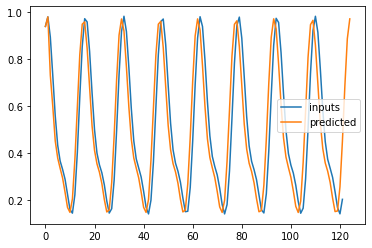

In [13]:
def pred_n_plot(data, model):# print(torch.tensor(x[0:1]).unsqueeze(1))
# inputs = np.zeros((498, 2))
# inputs = torch.cat((train_dict['1'][0,:-2,0], train_dict['1'][0,1:-1,0]), axis = 1)
    data_smaller = data[:,::step_size]
    i = 2
    inputs = torch.cat((data_smaller[i,:-3,0], data_smaller[i,1:-2,0], data_smaller[i,2:-1,0]), axis = 1)
    outputs = data_smaller[i,3:,0]
    # inputs = inputs[::step_size]
    # outputs = outputs[::4]

    # inputs = train_dict['1'][0,:-1,0]
    # outputs = train_dict['1'][0,2:,0]
    inputs_first = torch.tensor(inputs[:-1])
    plt.plot(inputs[:,0], label = "inputs")
    # plt.plot(outputs[:,0], label = "outputs")#,'--bo')
    t = 0
    y_pred = model_time(inputs_first[0:3].float())
    y_pred = torch.cat((inputs_first[0:3,0:2].float(),y_pred), axis = 1)
    to_plot = [y_pred.detach().numpy()[0,0]]
    # plt.plot(t,y_pred.detach().numpy()[0,0],'.')
    for i in range(int(498/step_size)):
        y_next = model_time(y_pred)
        y_next = torch.cat((y_pred[:, 1:3],y_next), axis = 1)
        to_plot.append(y_next.detach().numpy()[0,0])
    #     plt.plot(i + 2, y_next.detach().numpy()[0,0],'.')
        y_pred = y_next
    plt.plot(to_plot, label = "predicted")
    plt.legend()
    
# model_time = torch.load('./model_L1_D4_noise0.pt')
pred_n_plot(val_dict[str(current_size)], models[idx_lowest]) 
# pred = model_time.predict_mse()

4
step_sizes =  [1, 2, 4, 8, 16, 32]
mse =  [0.13235257789492608, 0.1648438200354576, 0.014995362795889377, 0.03998032197996508, 0.09305808898061514, 0.22039621143885596]


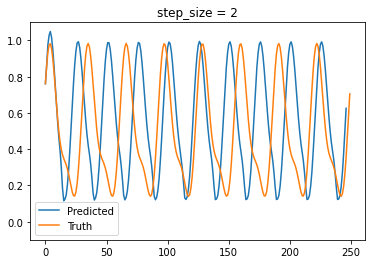

In [31]:
import ResNet as tnet

print(step_sizes[idx_lowest])    
print("step_sizes = ", step_sizes)
print("mse = ", mse_list)
utils.plot_lowest_error(val_dict[str(current_size)], models[1], i =2, title="step_size = " +str(step_sizes[1]))

# print(train_data.shape)
# dataset = tnet.DataSet(torch.flatten(train_data, 2,3), torch.flatten(val_data, 2,3), 
#                        torch.flatten(val_data, 2,3), 1, step_sizes[idx_lowest], 5)
# dataset.plot_val_data()

In [17]:


resolved, loss, unresolved_list = utils.find_error_4(val_dict['1'], models[idx_lowest], val_dict['2'])
print(loss.shape)
print(loss)



1 2
(2, 2)
[[0.20842555 0.15429656]
 [0.15429656 0.15429656]]


In [18]:

unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)

print(unresolved_list)

tensor([[1., 1.],
        [1., 1.]])


<ipython-input-18-4affd654daf5>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  unresolved_dict[str(current_size)] = torch.tensor(unresolved_list)


In [ ]:
next_train_data = unresolved_list * train_dict[str(current_size*2)]
print(next_train_data.shape)
plt.imshow(next_train_data[0,0])
plt.colorbar()
plt.show()

In [ ]:
model_keep.append(models[idx_lowest])
model_used_dict[str(current_size)] = [[0]]

In [ ]:
#====================================================================================
def find_error_1(data, model, tol = 1e-5):
    """
    Find error over the 1 square
    
    inputs:
        data: tensor of size (n_points, n_timesteps, dim, dim) to be predicted
        model: Resnet object to predict data on
        tol = 1e-5: tolerance level to mark points as resolved or not
        criterion = torch.nn.MSELoss(reduction='none')
        
    outputs:
        loss: float of mse
        resolved: boolean whether resolved or not
    """
    n_points, n_timesteps  = data.shape
    dim = 1
    data_input  = data.unsqueeze(2)
    y_preds = model.uni_scale_forecast(torch.tensor(data_input[:,0,:]).float(), n_steps=n_timesteps-1).reshape(( n_points, n_timesteps-1, dim,dim))
    data1 = data[:,1:]
    data2 = y_preds[:,:,0,0]
#     print()
    loss = torch.mean((data1-data2)**2)#mse(y_preds, data[:,1:])
    
#     print(loss)
    
    return loss, loss <= tol

#====================================================================================


current_size = 2
next_train_data = unresolved_list * train_dict[str(current_size)]

model_idx_list = np.ones((current_size, current_size))*(-1) #start with all -1

for i in range(current_size):
    for j in range(current_size):
        data_this = next_train_data[:,:,i,j]
        if (torch.min(data_this) == 0) and (torch.max(data_this) == 0):
            #don't need to do anything is model is resolved
            continue
        else:
        #see if the error is low enough on already made model
            for m, model in enumerate(model_keep):
                loss, resolved = find_error_1(data_this, model)
                step_size = model.step_size
                print("loss = ", loss)
                print("step_size = ", step_size)
                if resolved:
                    model_idx_list[i,j] == m
                    break
                else:
                    pass
            if not resolved:
                i = 0
                j = 1
                k = int(np.log2(step_size))
                print("k = ", k)
                print("train_dict[str(current_size)][:,:,i,j] shape = ", train_dict[str(current_size)][:,:,i,j].shape)
                #if no model good, train new model
                models, step_sizes, mse_list, idx_lowest = find_best_timestep(train_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], 
                                                              val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir,
                                                              i=i, j=j, start_k = max(0,k-1), largest_k = k+2)
                
                vbnm
                resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               models[idx_lowest], 
                                                               val_dict[str(current_size)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
                model_keep.append(models[idx_lowest])
                model_idx_list[i,j] == len(model_keep) #last model will be the one for this square
            
#             predicted = model.uni_scale_forecast(torch.tensor(data[:,0,:]).float(), n_steps=n_timesteps-1).reshape((  n_points, n_timesteps-1, dim,dim))

In [ ]:
print(step_sizes, mse_list, idx_lowest)
resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               models[idx_lowest], 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)    

In [ ]:
model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()

In [ ]:
plt.imshow(val_dict[str(current_size*2)][0,0])
plt.colorbar()

In [ ]:
step_size = (16+32)/2
print(step_size)
model = train_one_timestep(int(28), train_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), 
                           val_dict[str(current_size)][:,:,i,j].unsqueeze(2), current_size)
#                        dt = 1, n_forward = 5, noise=0, make_new = False, dont_train = True, 
#                        lr = 1e-3, max_epochs = 10000, batch_size = 50,threshold = 1e-4, 
#                        model_dir = './models/toy2',i=None, j = None):
    
#     train_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], 
#                                                               val_dict[str(current_size)][:,:,i,j], current_size,model_dir=model_dir, 
#                                                               i=i, j=j, start_k = max(0,k-1), largest_k = k+2)

In [ ]:
i = 0
j = 1
resolved, loss, unresolved_list = find_error_4(val_dict[str(current_size)][:,:,i,j], 
                                                               model, 
                                                               val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, j*current_size:(j+1)*current_size])
print(loss)

In [ ]:
# model =  models[idx_lowest]
print(idx_lowest)
n_timesteps = 500
n_points = 10
dim = 1
# plt.plot(model(val_dict[str(current_size)][:,:,i,j].unsqueeze(2).unsqueeze(3))[0,:,0,0].detach().numpy(), label = "predicted")
print(val_dict[str(current_size)][:,0,i,j].unsqueeze(1).shape)
val_data_this = val_dict[str(current_size)][:,0,i,j].unsqueeze(1)
predicted = model.uni_scale_forecast(val_data_this, n_steps=n_timesteps-1)
print(predicted.shape)
predicted_reshape = predicted.reshape((  n_points, n_timesteps-1, dim,dim))
plt.plot(predicted_reshape[0,:,0], label = "predicted")
print(val_dict[str(current_size*2)][:,:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size].shape)
# plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,0], label = "Truth")

plt.plot(val_dict[str(current_size*2)][:,1:, i*current_size:(i+1)*current_size, i*current_size:(i+1)*current_size][0,:,0,1], label = "Truth")
plt.legend()